In [43]:
import pandas as pd

In [44]:
df=pd.read_csv('tcc_ceds_music.csv')

In [45]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [46]:
sf=pd.read_csv('main_data.csv')

In [47]:
df=df[['track_name','danceability','loudness','acousticness','instrumentalness','valence','energy','genre']]

<Axes: >

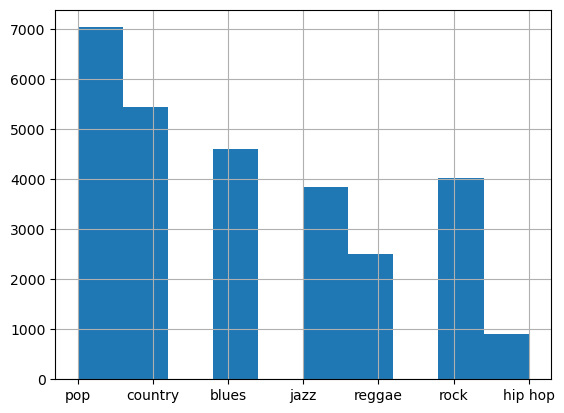

In [48]:
df['genre'].hist()

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

In [50]:
encoder=LabelEncoder()
df.genre=encoder.fit_transform(df['genre'])

In [51]:
x=df[['danceability','loudness','acousticness','instrumentalness','valence','energy']]
y=df.genre

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y,random_state=48)

In [53]:
model=KNeighborsClassifier(n_neighbors=30)

In [54]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.19      0.23      1519
           1       0.34      0.54      0.42      1797
           2       0.37      0.16      0.22       298
           3       0.48      0.32      0.38      1269
           4       0.32      0.37      0.34      2324
           5       0.44      0.43      0.43       825
           6       0.39      0.34      0.36      1331

    accuracy                           0.36      9363
   macro avg       0.38      0.33      0.34      9363
weighted avg       0.36      0.36      0.35      9363



In [56]:
df=df[df.genre.isin([0,2,3])==False]

In [57]:
x=df[['danceability','loudness','acousticness','instrumentalness','valence','energy']]

In [60]:
y=df.genre

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y,random_state=48)

In [62]:
model=KNeighborsClassifier(n_neighbors=30)

In [63]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [64]:
y_pred=model.predict(x_test)

In [65]:
accuracy=accuracy_score(y_test,y_pred)

In [66]:
accuracy

0.4881312729010674

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.49      0.60      0.54      1797
           4       0.45      0.48      0.47      2324
           5       0.57      0.44      0.50       825
           6       0.53      0.38      0.44      1331

    accuracy                           0.49      6277
   macro avg       0.51      0.48      0.49      6277
weighted avg       0.49      0.49      0.49      6277



In [19]:
import numpy as np
from sklearn.model_selection import  KFold,GridSearchCV
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 60, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 58 candidates, totalling 290 fits
{'n_neighbors': 59}


In [20]:
y_pred=knn_cv.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.51      0.60      0.55      1797
           4       0.47      0.51      0.49      2324
           5       0.58      0.46      0.51       825
           6       0.56      0.41      0.47      1331

    accuracy                           0.51      6277
   macro avg       0.53      0.49      0.51      6277
weighted avg       0.51      0.51      0.51      6277



In [21]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2,60, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_score[neighbor]=knn.score(x_train, y_train)
    test_score[neighbor]=knn.score(x_test, y_test)

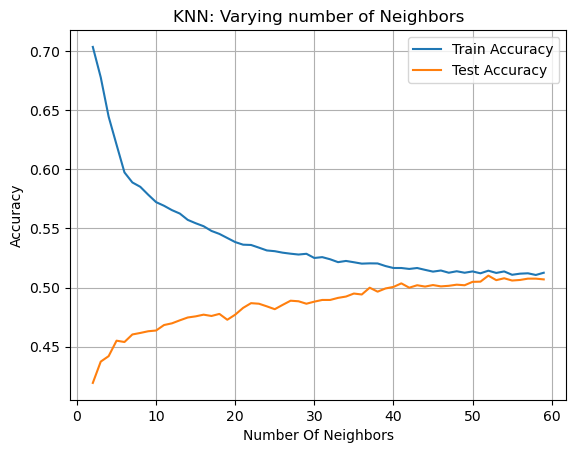

In [22]:
from matplotlib import pyplot as plt
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.grid()
plt.show()

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier(n_neighbors=59)
sfs = SequentialFeatureSelector(knn, n_features_to_select=4, direction='forward')
sfs.fit(x, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=59),
                          n_features_to_select=4)

In [36]:
x_selected=sfs.transform(x)

In [37]:
x_selected

array([[0.35773855, 0.99799197, 0.33944765, 0.13711019],
       [0.33174483, 0.95481923, 0.32502061, 0.26324025],
       [0.45629806, 0.84036129, 0.35181369, 0.13911225],
       ...,
       [0.50720243, 0.07158541, 0.37242374, 0.73172335],
       [0.70107224, 0.33634472, 0.48680956, 0.46244567],
       [0.61226037, 0.02198697, 0.27761748, 0.52751277]])

In [38]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_selected,y,test_size=0.33,stratify=y,random_state=48)

In [40]:
select_model=KNeighborsClassifier(n_neighbors=59)

In [41]:
select_model.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=59)

In [42]:
y1_pred=select_model.predict(x1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           1       0.50      0.58      0.53      1797
           4       0.46      0.50      0.48      2324
           5       0.57      0.43      0.49       825
           6       0.54      0.42      0.47      1331

    accuracy                           0.50      6277
   macro avg       0.52      0.48      0.49      6277
weighted avg       0.50      0.50      0.50      6277



In [30]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model=KNeighborsClassifier(n_neighbors=51)


stacked_model = StackingClassifier(
    estimators=[
        ('svm', svm_model),
        ('rf', rf_model),
        ('knn',knn_model)
    ],
    final_estimator=LogisticRegression(),
) 

stacked_model.fit(x_train, y_train)

y_pred_stacked = stacked_model.predict(x_test)


print("Stacked Model Classification Report:\n", classification_report(y_test, y_pred_stacked))
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred_stacked))

/Users/yashtyagi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacked Model Classification Report:
               precision    recall  f1-score   support

           1       0.55      0.57      0.56      1797
           4       0.46      0.58      0.52      2324
           5       0.60      0.45      0.51       825
           6       0.59      0.39      0.47      1331

    accuracy                           0.52      6277
   macro avg       0.55      0.50      0.51      6277
weighted avg       0.53      0.52      0.52      6277

Stacked Model Accuracy: 0.5193563804365142


In [31]:
from imblearn.over_sampling import RandomOverSampler
df_new=df[df.genre.isin([4])==False]
x2=df_new[['danceability','loudness','acousticness','instrumentalness','valence','energy']]
y2=df_new.genre
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.33,stratify=y2,random_state=48)
oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x2_train, y2_train)

knn_model = KNeighborsClassifier(n_neighbors=51)
knn_model.fit(x_resampled, y_resampled)

y_pred = knn_model.predict(x2_test)

accuracy = accuracy_score(y2_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 67.52%


In [32]:
print(classification_report(y2_test,y_pred))

              precision    recall  f1-score   support

           1       0.72      0.71      0.71      1797
           5       0.55      0.72      0.62       825
           6       0.74      0.60      0.66      1331

    accuracy                           0.68      3953
   macro avg       0.67      0.68      0.67      3953
weighted avg       0.69      0.68      0.68      3953



<Axes: >

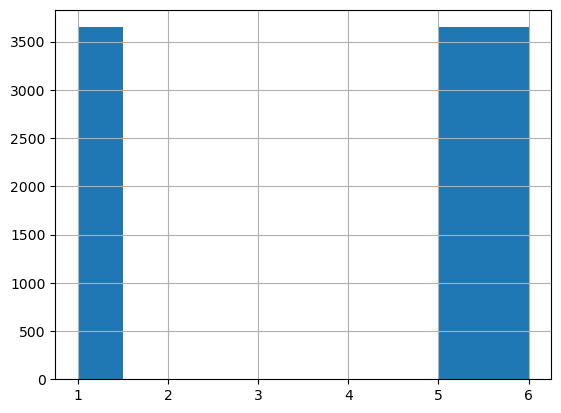

In [33]:
y_resampled.hist()

In [34]:
import pickle
pickle.dump( model, open( "save.pkl", "wb" ) )